<a href="https://colab.research.google.com/github/ErikFantomex/MPI_Curso/blob/master/Lecture_MPI_comunicaci%C3%B3n_punto_a_punto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#in order to use mpi library in python 
!pip install mpi4py

# Curso MPI 

#MPI_Send()
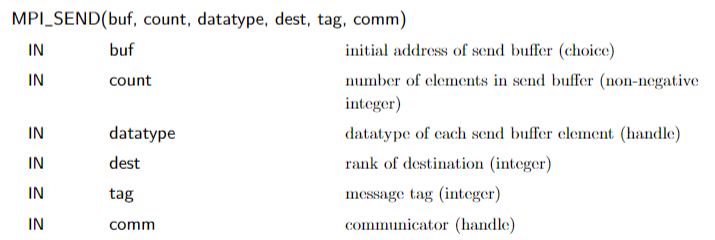

MPI proporciona cuatro versiones para el modelo de comunicación de bloqueo 

**Synchronous**, *MPI_Ssend()*, la operación se da por finalizada sólo cuando el mensaje ha sido recibido en el destino. Espera al receptor. 

**Buffered**, *MPI_Bsend()*, el mensaje se guarda en un buffer, definido por el usuario. La operación se da por finalizada en cuanto se realiza la copia. Si no hay espacio, el envío falla. El tamaño del buffer es controlada por el usuario mediante la función  [MPI_Buffer_attach()](https://www.mpich.org/static/docs/latest/www3/MPI_Buffer_attach.html). 

**Ready**, *MPI_Rsend()*, la operación sólo tiene éxito si se ha iniciado ya la recepción correspondiente (el receptor está preparado). 

**Estándar** *MPI_Send()*,  la biblioteca decide si espera o copia en memoria el mensaje en el buffer y retorna.  

#MPI_Recv()

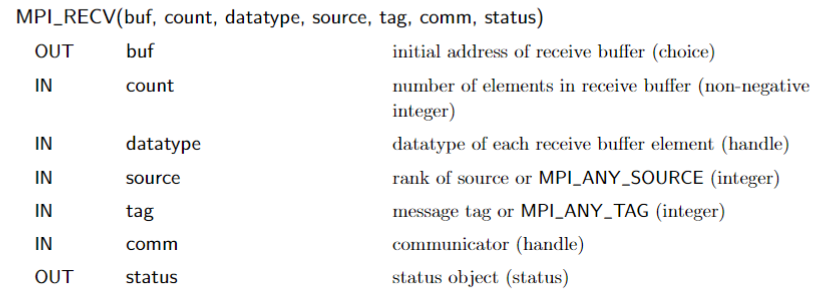




##Tipos de dato
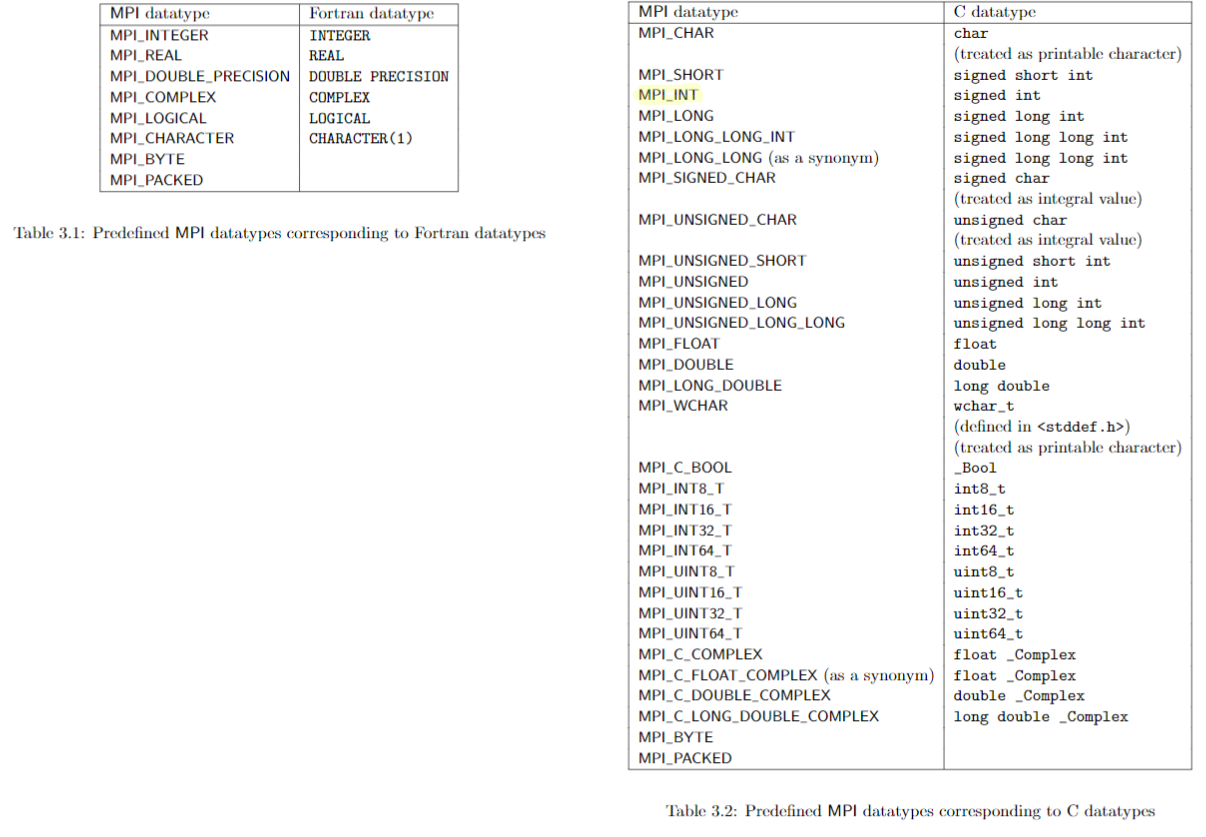

## Etiqueta
La etiqueta es un número entero en el rango [0,MAX_TAG_UB], donde MAX_TAG_UB >= 32767 

In [ ]:
%%writefile obteniendo_valor_MAX_TAG_UB.c
#include "mpi.h"
#include <stdio.h>

void main () {
  MPI_Init(NULL, NULL);
  int flag;
  int *tag_ub;

  MPI_Comm_get_attr(MPI_COMM_WORLD, MPI_TAG_UB, &tag_ub, &flag);

  if (flag)    
    printf("\nEl valor máximo permitido para la etiqueta es %d" ,*tag_ub);
  else
    printf("\nNo tengo idea del máximo valor permitido para la etiqueta");

  MPI_Finalize(); 
  return;
}

Writing obteniendo_valor_MAX_TAG_UB.c


In [ ]:
%%script bash
mpicc obteniendo_valor_MAX_TAG_UB.c -o valorEtiq
mpirun --allow-run-as-root -np 1 valorEtiq


El valor máximo permitido para la etiqueta es 2147483647

## Errores posibles

MPI_SUCCESS 

No ha habido error, la función MPI se ha realizado satisfactoriamente. 

MPI_ERR_COMM 

El comunicador seleccionado no es válido. Un error común es usar un comunicador nulo. 

MPI_ERR_COUNT 

Valor de count no válido. El argumento count debe ser un valor no negativo, es posible utilizar el valor cero. 

MPI_ERR_TYPE 

Argumento datatype no válido. Puede ocurrir cuando no se hace commit del tipo de dato (Véase MPI_Type_commit). 

MPI_ERR_TAG 

Error de tag (etiqueta) no válido. La etiqueta debe tener un valor no negativo. Se permite utilizar en el recibimiento la etiqueta MPI_ANY_TAG. 

MPI_ERR_RANK 

Rango (rank) de origen o de destino no válido. El valor debe estar comprendido entre cero y el número de procesos del comunicador menos uno. El rango en una función de recibir (como MPI_Recv) puede tomar el valor de MPI_ANY_SOURCE. 



#**Ejemplo1**. Envío de un mensaje del 0 al 1

Que se envien un único mensaje de tipo numérico (entero o real)

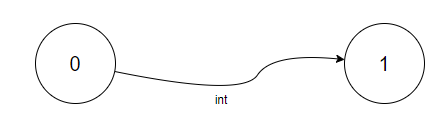

## C

In [ ]:
%%writefile envio_mensaje1.c
#include "mpi.h"
#include <stdio.h>

void main () {
    MPI_Init(NULL, NULL);


    int rank, size,variable;

    MPI_Comm_size(MPI_COMM_WORLD, &size); // Numero total de procesos
    MPI_Comm_rank(MPI_COMM_WORLD, &rank); // Valor de nuestro identificador

    if(rank==0){
        variable = 10;
        MPI_Send(&variable, 1, MPI_INT, 3, 9, MPI_COMM_WORLD);
    }
    if(rank==3){
	    MPI_Recv(&variable, 1, MPI_INT, 0, 9, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
 	    printf("Soy el proceso %d, recibí el mensaje  => %d \n",rank,variable);
    }

                            
    MPI_Finalize(); 
    return ;
}

Overwriting envio_mensaje1.c


In [ ]:
%%script bash
mpicc envio_mensaje1.c -o envio_mensaje1
mpirun --allow-run-as-root -np 5 envio_mensaje1

Soy el proceso 3, recibí el mensaje  => 10 


## C++

In [ ]:
%%writefile envio_saludo.cpp
#include <mpi.h>
#include <cstdlib>
#include <iostream>
using namespace std;
int main ( ) {
    MPI_Init(NULL, NULL);

    int rank, size,variable;

    MPI_Comm_size(MPI_COMM_WORLD, &size); // Numero total de procesos
    MPI_Comm_rank(MPI_COMM_WORLD, &rank); // Valor de nuestro identificador

    if(size>=4){
      if(rank==0){
          variable = 10;
          MPI_Send(&variable, 1, MPI_INT, 3,9,MPI_COMM_WORLD);
      }
      
      if(rank==3){
        MPI_Recv(&variable,1,MPI_INT,0,9,MPI_COMM_WORLD,MPI_STATUS_IGNORE);
        cout <<"Soy el proceso "<< rank << ", recibí el mensaje  => " << variable << endl;
      }
    }else{
        if(rank==0)
          cout << "No hay procesos suficientes";
    }
                            
    MPI_Finalize(); 
    return 0;
}


Overwriting envio_saludo.cpp


In [ ]:
%%script bash
mpicxx  envio_saludo.cpp -o envio_saludo
mpirun --allow-run-as-root -np 10 envio_saludo

Soy el proceso 3, recibí el mensaje  => 10


## Python

In [ ]:
%%writefile envio_saludo.py
from mpi4py import MPI

comm = MPI.COMM_WORLD

rank = comm.Get_rank()
size = comm.Get_size()

if rank == 0:
    variable = 10
    comm.send(variable, dest=1, tag=11)
elif rank == 1:
    variable = comm.recv(source=0, tag=11)
    print("Soy el proceso ", rank, ", recibí el mensaje  => ",variable)

Writing envio_saludo.py


In [ ]:
%%script bash
mpiexec --allow-run-as-root -n 5 python envio_saludo.py

Soy el proceso  1 , recibí el mensaje  =>  10


[Regreso al índice](https://colab.research.google.com/drive/1FkTDokPR8tsXMH9PKeEi6Fvdd3tzqIkz)

#**Ejemplo2**. Envío de un saludo del 0 al 1

Que se envien un único mensaje, con un arreglo de caracteres.

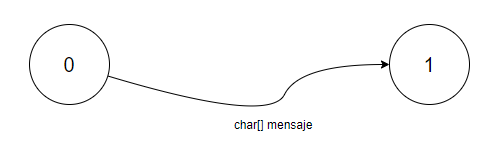

##C

In [ ]:
%%writefile envio_mensaje2.c
#include "mpi.h"
#include <stdio.h>
#include <string.h>
void main () {
    MPI_Init(NULL, NULL);

    int rank, size;
    char mensaje[50];

    MPI_Comm_size(MPI_COMM_WORLD, &size); // Numero total de procesos
    MPI_Comm_rank(MPI_COMM_WORLD, &rank); // Valor de nuestro identificador

    if(rank==0){
        strcpy(mensaje, "Hola, proceso 1, un saludo desde el 0");
        MPI_Send(mensaje, strlen(mensaje)+1, MPI_CHAR, 1, 9, MPI_COMM_WORLD);
    }
    
    if(rank==1){
	    MPI_Recv(mensaje, 50, MPI_CHAR, 0, 9, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
 	    printf("Soy el proceso %d, recibí el mensaje => %s \n",rank,mensaje);
    }
                            
    MPI_Finalize(); 
    return ;
}

Overwriting envio_mensaje2.c


In [ ]:
%%script bash
mpicc envio_mensaje2.c -o envio_mensaje2
mpirun --allow-run-as-root -np 5 envio_mensaje2


Process is terminated.


##C++

In [ ]:
%%writefile envio_mensaje2.cpp
#include "mpi.h"
#include <iostream>
#include <cstring>
using namespace std;
int main () {
    MPI_Init(NULL, NULL);

    int rank, size;
    char mensaje[50];

    MPI_Comm_size(MPI_COMM_WORLD, &size); // Numero total de procesos
    MPI_Comm_rank(MPI_COMM_WORLD, &rank); // Valor de nuestro identificador

    if(rank==0){
        strcpy(mensaje, "Hola, proceso 1, un saludo desde el 0");
        MPI_Send(mensaje, strlen(mensaje)+1, MPI_CHAR, 1, 9, MPI_COMM_WORLD);
    }
    if(rank==1){
	    MPI_Recv(mensaje, 50, MPI_CHAR, 0, 9, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
 	    cout << "Soy el proceso " << rank <<", recibí el mensaje  => " << mensaje <<endl;
    }
                            
    MPI_Finalize(); 
    return 0;
}

Overwriting envio_mensaje2.cpp


In [ ]:
%%script bash
mpicxx envio_mensaje2.cpp -o envio_mensaje2
mpirun --allow-run-as-root -np 5 envio_mensaje2

Soy el proceso 1, recibí el mensaje  => Hola, proceso 1, un saludo desde el 0


##Python


In [ ]:
%%writefile envio_mensaje2.py
from mpi4py import MPI

comm = MPI.COMM_WORLD

rank = comm.Get_rank()
size = comm.Get_size()

if rank == 0:
    mensaje = "Hola, proceso 1, un saludo desde el 0"
    comm.send(mensaje, dest=1, tag=11)
elif rank == 1:
    mensaje = comm.recv(source=0, tag=11)
    print("Soy el proceso " + str(rank)  + ", recibí el mensaje => " + mensaje)

Writing envio_mensaje2.py


In [ ]:
%%script bash
mpiexec --allow-run-as-root -n 5 python envio_mensaje2.py

Soy el proceso 1, recibí el mensaje => Hola, proceso 1, un saludo desde el 0


# **Ejemplo3**. Intercambio de mensajes entre el 0 y el 1
El 0 envía un mensaje al 1 y el 1 envía un mensaje al 0

Importante: hay que tener cuidado con el orden en que se llaman a las operaciones de envío y recepción para evitar un **deadlock**.

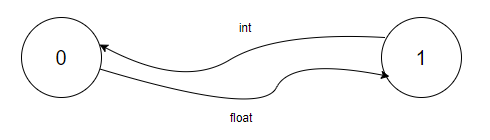

## C

In [ ]:
%%writefile intercambio.c
#include "mpi.h"
#include <stdio.h>
void main( ){
    MPI_Init(NULL, NULL);

    int rank, size, y;
    float x;

    MPI_Comm_size(MPI_COMM_WORLD, &size); // Numero total de procesos
    MPI_Comm_rank(MPI_COMM_WORLD, &rank); // Valor de nuestro identificador

    if( rank == 0 ){
        x = 3.141596;
        MPI_Send(&x, 1, MPI_FLOAT, 1, 9, MPI_COMM_WORLD);

        MPI_Recv(&y, 1, MPI_INT  , 1, 10, MPI_COMM_WORLD, MPI_STATUS_IGNORE);  
        printf("Soy el proceso %d, recibí el mensaje  = %d \n",rank,y);   
    }

    if( rank == 1 ){
	    MPI_Recv(&x, 1, MPI_FLOAT, 0, 9, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
 	    printf("Soy el proceso %d, recibí el mensaje  = %f \n",rank,x);

      y=7;
      MPI_Send(&y, 1, MPI_INT, 0, 10, MPI_COMM_WORLD); 
    }
                            
    MPI_Finalize(); 
    return ;
}

Writing intercambio.c


In [ ]:
%%script bash
mpicc intercambio.c -o envio_mensaje2
mpirun --allow-run-as-root -np 2 envio_mensaje2

Soy el proceso 1, recibí el mensaje  = 3.141596 
Soy el proceso 0, recibí el mensaje  = 7 


##C++

In [ ]:
%%writefile intercambio.cpp
#include "mpi.h"
#include <iostream>

using namespace std;

int main( ){
    MPI_Init(NULL, NULL);

    int rank, size, y;
    float x;

    MPI_Comm_size(MPI_COMM_WORLD, &size); // Numero total de procesos
    MPI_Comm_rank(MPI_COMM_WORLD, &rank); // Valor de nuestro identificador

    if( rank == 0 ){
        x = 3.141596;
        MPI_Send(&x, 1, MPI_FLOAT, 1, 9, MPI_COMM_WORLD);

        MPI_Recv(&y, 1, MPI_INT  , 1, 10, MPI_COMM_WORLD, MPI_STATUS_IGNORE);  
        cout <<"Soy el proceso " << rank << ", recibí el mensaje  = " << y << endl;   
    }

    if( rank == 1 ){
	    MPI_Recv(&x, 1, MPI_FLOAT, 0, 9, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
 	    cout << "Soy el proceso " << rank << ", recibí el mensaje  = " << x << endl;

      y=7;
      MPI_Send(&y, 1, MPI_INT, 0, 10, MPI_COMM_WORLD); 
    }
                            
    MPI_Finalize(); 
    return 0;
}

Writing intercambio.cpp


In [ ]:
%%script bash
mpicxx intercambio.cpp -o intercambio
mpirun --allow-run-as-root -np 2 intercambio

Soy el proceso 1, recibí el mensaje  = 3.1416
Soy el proceso 0, recibí el mensaje  = 7


##Python

In [ ]:
%%writefile intercambia.py
from mpi4py import MPI

comm = MPI.COMM_WORLD

rank = comm.Get_rank()
size = comm.Get_size()

if rank == 0:
  x = 3.1416
  comm.send(x,dest=1,tag=9)
  
  y = comm.recv(source=1,tag=10)
  print("Soy el proceso " + str(rank) + ", recibí el mensaje  = " + str(y))

if rank == 1:
  x = comm.recv(source = 0, tag =9)
  print("Soy el proceso " + str(rank) + ", recibí el mensaje  = " + str(x))

  y = 7
  comm.send(y,dest=0,tag=10)
  



Overwriting intercambia.py


In [ ]:
%%script bash
mpiexec --allow-run-as-root -n 5 python intercambia.py

Soy el proceso 1, recibí el mensaje  = 3.1416
Soy el proceso 0, recibí el mensaje  = 7


#**Ejemplo4**. Envío de dos mensajes del 0 al 1

Que se envien dos mensajes de diferente tipo. Este ejemplo servirá para ilustrar el uso de la variable status.

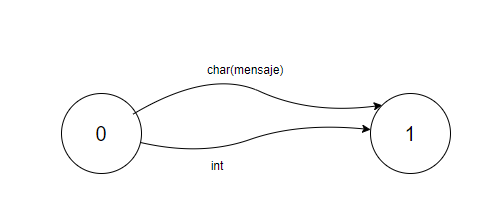

##C

In [ ]:
%%writefile envio_mensaje3.c
#include "mpi.h"
#include <stdio.h>
#include <string.h>
void main () {
    MPI_Init(NULL, NULL);

    int rank, size;    
    float x;
    char mensaje[50];

    MPI_Comm_size(MPI_COMM_WORLD, &size); // Numero total de procesos
    MPI_Comm_rank(MPI_COMM_WORLD, &rank); // Valor de nuestro identificador

    if(rank==0){
        strcpy(mensaje, "Hola, proceso 1, un saludo desde el 0");
        MPI_Send(mensaje, strlen(mensaje)+1, MPI_CHAR, 1, 12, MPI_COMM_WORLD);
        
        x = 3.14;
        MPI_Send(&x,1,MPI_FLOAT, 1, 9, MPI_COMM_WORLD );
    }
    
    if(rank==1){
	    MPI_Recv(mensaje, 50, MPI_CHAR, 0, 12, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
 	    printf("Soy el proceso %d, recibí el mensaje => %s \n",rank,mensaje);

      MPI_Recv(&x, 1, MPI_FLOAT, 0, 9, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
      printf("y también recibi el mensaje => %f", x);
    }
                            
    MPI_Finalize(); 
    return ;
}

Overwriting envio_mensaje3.c


In [ ]:
%%script bash
mpicc envio_mensaje3.c -o envio_mensaje3
mpirun --allow-run-as-root -np 2 envio_mensaje3

Soy el proceso 1, recibí el mensaje => Hola, proceso 1, un saludo desde el 0 
y también recibi el mensaje => 3.140000

##C++

In [ ]:
%%writefile envio_mensaje3.cpp
#include "mpi.h"
#include <iostream>
#include <cstring>
using namespace std;
int main () {
    MPI_Init(NULL, NULL);

    int rank, size;    
    float x;
    char mensaje[50];

    MPI_Comm_size(MPI_COMM_WORLD, &size); // Numero total de procesos
    MPI_Comm_rank(MPI_COMM_WORLD, &rank); // Valor de nuestro identificador

    if(rank==0){
        strcpy(mensaje, "Hola, proceso 1, un saludo desde el 0");
        MPI_Send(mensaje, strlen(mensaje)+1, MPI_CHAR, 1, 9, MPI_COMM_WORLD);
        
        x = 3.14;
        MPI_Send(&x,1,MPI_FLOAT, 1, 12, MPI_COMM_WORLD );
    }
    
    if(rank==1){
	    MPI_Recv(mensaje, 50, MPI_INT, 0, 9, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
 	    cout << "Soy el proceso " << rank << ", recibí el mensaje => " << mensaje << endl;

      MPI_Recv(&x, 1, MPI_FLOAT, 0, 12, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
      cout << "y también recibi el mensaje => " << x;
    }
                            
    MPI_Finalize(); 
    return 0;
}

Writing envio_mensaje3.cpp


In [ ]:
%%script bash
mpicxx envio_mensaje3.cpp -o envio_mensaje3
mpirun --allow-run-as-root -np 2 envio_mensaje3

Soy el proceso 1, recibí el mensaje => Hola, proceso 1, un saludo desde el 0
y también recibi el mensaje => 3.14

##Python

In [ ]:
%%writefile envio_mensaje3.py
from mpi4py import MPI

comm = MPI.COMM_WORLD

rank = comm.Get_rank()
size = comm.Get_size()

if rank == 0:
    mensaje = "Hola, proceso 1, un saludo desde el 0"
    comm.send(mensaje, dest=1, tag=11)
    x = 3.14
    comm.send(x,dest=1,tag=12)
elif rank == 1:
    mensaje = comm.recv(source=0, tag=11)
    print("Soy el proceso " + str(rank)  + ", recibí el mensaje => " + mensaje)
    x = comm.recv(source=0,tag=12)
    print("y también recibi el mensaje => ", x)

Overwriting envio_mensaje3.py


In [ ]:
%%script bash
mpiexec --allow-run-as-root -n 5 python envio_mensaje3.py

Soy el proceso 1, recibí el mensaje => Hola, proceso 1, un saludo desde el 0
y también recibi el mensaje =>  3.14


# **Ejemplo5**. Envío de un mensaje desde el 0 a todos (broadcast)

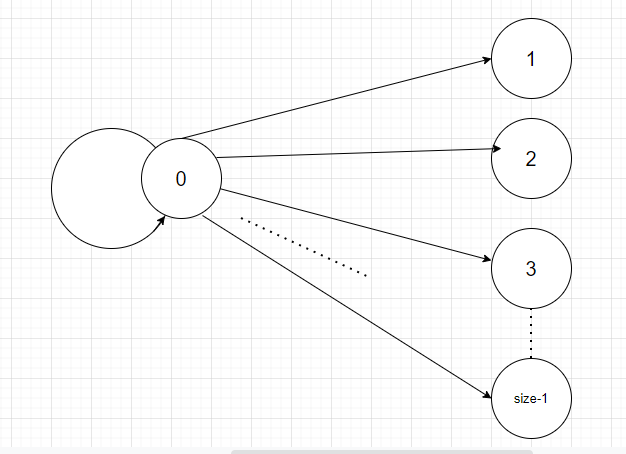

##C

In [ ]:
%%writefile envio_saludo_0_todos.c

#include "mpi.h"
#include <stdlib.h>
#include <stdio.h>
#include <unistd.h>
void main (   ) {
    MPI_Init( NULL, NULL );

    int rank,size,i,root=2, etiq=9;
    float x;
    double t1;

    MPI_Comm_size( MPI_COMM_WORLD, &size ); // Numero total de procesos
    MPI_Comm_rank( MPI_COMM_WORLD, &rank ); // Valor de nuestro identificador

    t1 = MPI_Wtime();
    if( rank==root ){
        x = 10.8;
        for( i = 0 ; i < size ; i++ )           
           MPI_Send( &x, 1, MPI_FLOAT, i, etiq, MPI_COMM_WORLD );
    }

	  MPI_Recv( &x, 1, MPI_FLOAT, root, etiq, MPI_COMM_WORLD, MPI_STATUS_IGNORE );
	  //printf( "Soy el proceso %d y recibi el mensaje <%f>  \n", rank, x );

    MPI_Barrier(MPI_COMM_WORLD);
    
    if(rank==0)
       printf("Pseudo Bcast: %.10f segundos \n", MPI_Wtime()-t1);


    MPI_Finalize(  ); 
    return;
}

Overwriting envio_saludo_0_todos.c


In [ ]:
%%script bash
mpicc envio_saludo_0_todos.c -o bcast
mpirun --allow-run-as-root -np 10 bcast

Pseudo Bcast: 0.0022168350 segundos 


##C++

In [ ]:
%%writefile envio_saludo_0_todos.cpp
#include "mpi.h"
#include <iostream>
#include <cstdlib>
#include <cstring>
using namespace std;
int main( ) {
    MPI_Init(NULL, NULL);
    
    int rank, size, i, root;
    char mensaje[40];

    MPI_Comm_size(MPI_COMM_WORLD, &size); // Numero total de procesos
    MPI_Comm_rank(MPI_COMM_WORLD, &rank); // Valor de nuestro identificador

    root = 0;
    if( root == 0) {
        for( i = 0; i < size; i++ ){
           sprintf( mensaje, "Hola proceso %d, un saludo desde el %d", i, root );
           MPI_Send( mensaje, strlen(mensaje)+1, MPI_CHAR, i, 9, MPI_COMM_WORLD );
        }
    }

	  MPI_Recv( mensaje, 40, MPI_CHAR, root, 9, MPI_COMM_WORLD, MPI_STATUS_IGNORE );
	  cout << "Soy el proceso " << rank << " y recibi el mensaje <" << mensaje << ">" << endl;  
                            
    MPI_Finalize(); 
    return 0;
}

Writing envio_saludo_0_todos.cpp


In [ ]:
%%script bash
mpicxx envio_saludo_0_todos.cpp -o bcast
mpirun --allow-run-as-root -np 5 bcast

Soy el proceso 0 y recibi el mensaje <Hola proceso 0, un saludo desde el 0>
Soy el proceso 1 y recibi el mensaje <Hola proceso 1, un saludo desde el 0>
Soy el proceso 2 y recibi el mensaje <Hola proceso 2, un saludo desde el 0>
Soy el proceso 3 y recibi el mensaje <Hola proceso 3, un saludo desde el 0>
Soy el proceso 4 y recibi el mensaje <Hola proceso 4, un saludo desde el 0>


##Python

In [ ]:
%%writefile envio_saludo_0_todos.py
from mpi4py import MPI

comm = MPI.COMM_WORLD

rank = comm.Get_rank()
size = comm.Get_size()

root = 0
if rank == root:
    for i in range(0,size):
      mensaje = "Hola proceso "+str(i)+", un saludo desde el "+ str(root )
      comm.send(mensaje, dest=i, tag=11)

mensaje = comm.recv(source=root, tag=11)
print("Soy el proceso " + str(rank)  + " y recibí el mensaje <" + mensaje +">")
  

Writing envio_saludo_0_todos.py


In [ ]:
%%script bash
mpiexec --allow-run-as-root -n 5 python envio_saludo_0_todos.py

Soy el proceso 0 y recibí el mensaje <Hola proceso 0, un saludo desde el 0>
Soy el proceso 2 y recibí el mensaje <Hola proceso 2, un saludo desde el 0>
Soy el proceso 3 y recibí el mensaje <Hola proceso 3, un saludo desde el 0>
Soy el proceso 4 y recibí el mensaje <Hola proceso 4, un saludo desde el 0>
Soy el proceso 1 y recibí el mensaje <Hola proceso 1, un saludo desde el 0>


# **Ejemplo6**. Todos envían un mensaje al 0.


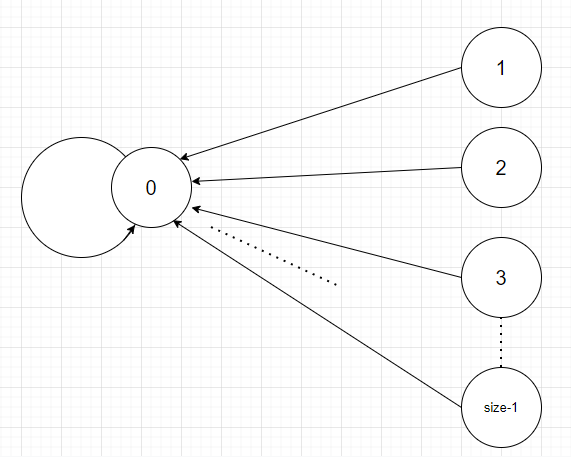

##C

In [ ]:
%%writefile envio_saludo_todos_0.c
#include "mpi.h"
#include <stdlib.h>
#include <stdio.h>
#include<string.h>
void main ( ) {
    MPI_Init(NULL, NULL);

    int rank,size,i, root=0;
    char mensaje[50];

    MPI_Comm_size(MPI_COMM_WORLD, &size); 
    MPI_Comm_rank(MPI_COMM_WORLD, &rank); 

    sprintf ( mensaje,"Hola proceso %d, un saludo desde el proceso %d", root, rank );
    MPI_Send( mensaje, strlen(mensaje)+1, MPI_CHAR, root, 9, MPI_COMM_WORLD );

    if( rank == root ){
        printf( "Soy el proceso %d y recibí los mensajes:\n", root );
        for( i = 0 ; i < size ; i++ ){
            MPI_Recv( mensaje, 50, MPI_CHAR, i, 9, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
            printf( "<%s>\n", mensaje );           
        }
    }    
                            
    MPI_Finalize(); 
    return ;
}

Writing envio_saludo_todos_0.c


In [ ]:
%%script bash
mpicc envio_saludo_todos_0.c -o bcast2
mpirun --allow-run-as-root -np 5 bcast2

Soy el proceso 0 y recibí los mensajes:
<Hola proceso 0, un saludo desde el proceso 0>
<Hola proceso 0, un saludo desde el proceso 1>
<Hola proceso 0, un saludo desde el proceso 2>
<Hola proceso 0, un saludo desde el proceso 3>
<Hola proceso 0, un saludo desde el proceso 4>


##C++

In [ ]:
%%writefile envio_saludo_todos_0.cpp

#include <iostream>
#include "mpi.h"
#include <cstdlib>
#include <cstring>

using namespace std;

int main () {
    MPI_Init(NULL, NULL);

    int rank,size,i, root=0;
    char mensaje[50];

    MPI_Comm_size( MPI_COMM_WORLD, &size ); // Numero total de procesos
    MPI_Comm_rank( MPI_COMM_WORLD, &rank ); // Valor de nuestro identificador

    sprintf( mensaje,"Hola, proceso %d, un saludo desde el proceso %d",root,rank);    
    MPI_Send( mensaje, strlen(mensaje) + 1, MPI_CHAR, root, 9, MPI_COMM_WORLD );

    if( rank == root ){
        cout << "Soy el proceso " << rank << " y recibí los mensajes:\n";
        for( i = 0 ; i < size ; i++ ){
            MPI_Recv( mensaje, 50, MPI_CHAR, i, 9, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
            cout << "<"<< mensaje << ">\n";  
        }
    }   
                            
    MPI_Finalize(); 
    return 0;
}

Writing envio_saludo_todos_0.cpp


In [ ]:
%%script bash
mpicxx envio_saludo_todos_0.cpp -o bcast2
mpirun --allow-run-as-root -np 5 bcast2

Soy el proceso 0 y recibí los mensajes:
<Hola, proceso 0, un saludo desde el proceso 0>
<Hola, proceso 0, un saludo desde el proceso 1>
<Hola, proceso 0, un saludo desde el proceso 2>
<Hola, proceso 0, un saludo desde el proceso 3>
<Hola, proceso 0, un saludo desde el proceso 4>


##Python

In [ ]:
%%writefile envio_saludo_todos_0.py
from mpi4py import MPI

comm = MPI.COMM_WORLD

rank = comm.Get_rank()
size = comm.Get_size()

root = 0

mensaje = 'Hola proceso '+ str(root)+ ', un saludo desde el proceso ' + str(rank)
comm.send(mensaje, dest=root, tag=11) 

if rank == root:
  print("Soy el proceso " + str(rank) + " y recibí los mensajes:")
  for i in range(0,size):
      mensaje = comm.recv(source=i, tag=11)
      print(mensaje)

Overwriting envio_saludo_todos_0.py


In [ ]:
%%script bash
mpiexec --allow-run-as-root -n 5 python envio_saludo_todos_0.py

Soy el proceso 0 y recibí los mensajes:
Hola proceso 0, un saludo desde el proceso 0
Hola proceso 0, un saludo desde el proceso 1
Hola proceso 0, un saludo desde el proceso 2
Hola proceso 0, un saludo desde el proceso 3
Hola proceso 0, un saludo desde el proceso 4


# **Ejemplo7**. Usando el MPI_Status

Hasta ahora hemos ignorado el último argumento en MPI_Recv(), la variable de tipo MPI_Status. 

Se trata de una estructura, cuya definición se muestra a continuación:

```
struct MPI_Struct{
  int MPI_SOURCE;
  int MPI_TAG;
  int MPI_ERROR;
};
```

Comúnmente, se utiliza en conjunto con los comodines de recepción **MPI_ANY_TAG** y **MPI_ANY_SOURCE**. 

---- explicación incompleta <------


## ejemplo1
Usando MPI_ANY_SOURCE

### C

In [ ]:
%%writefile usando_status_comodin_source.c
#include "mpi.h"
#include <stdlib.h>
#include <stdio.h>
#include<string.h>
// Ejemplo 6 usando comodines 
// (cada proceso envía un mensaje al root, incluido él mismo. El root, recibe un mensaje de todos) 
void main ( ) {
    MPI_Init(NULL, NULL);
    
    int rank, size, i, root=0;
    char mensaje[30];
    MPI_Status status;

    MPI_Comm_size( MPI_COMM_WORLD, &size ); // Numero total de procesos
    MPI_Comm_rank( MPI_COMM_WORLD, &rank ); // Valor de nuestro identificador
    
    sprintf( mensaje, "Hola proceso %d", root );
    MPI_Send( mensaje, strlen(mensaje) + 1, MPI_CHAR, root, 5, MPI_COMM_WORLD);

    if ( rank == root ){
        printf( "Soy el proceso %d y recibí los mensajes:\n", rank );
        for( i = 0 ; i < size ; i++ ){
            MPI_Recv( mensaje, 30, MPI_CHAR, MPI_ANY_SOURCE, 5, MPI_COMM_WORLD, &status );
            printf( "Recibí <%s> desde %d, con etiqueta %d\n", mensaje, status.MPI_SOURCE, 5 );
        }
    }    
                            
    MPI_Finalize(); 
    return ;
}

Overwriting usando_status_comodin_source.c


In [ ]:
%%script bash
mpicc usando_status_comodin_source.c -o status1
mpirun --allow-run-as-root -np 5 status1

Soy el proceso 0 y recibí los mensajes:
Recibí <Hola proceso 0> desde 0, con etiqueta 5
Recibí <Hola proceso 0> desde 1, con etiqueta 5
Recibí <Hola proceso 0> desde 2, con etiqueta 5
Recibí <Hola proceso 0> desde 3, con etiqueta 5
Recibí <Hola proceso 0> desde 4, con etiqueta 5


### C++

In [ ]:
%%writefile usando_status_comodin_source.cpp
#include <iostream>
#include "mpi.h"
#include <cstdlib>
#include <cstring>
using namespace std;
int main ( ) {
    MPI_Init(NULL, NULL);

    int rank, size, i , root = 0, etiq = 5;
    char mensaje[30];
    MPI_Status status;

    MPI_Comm_size( MPI_COMM_WORLD, &size ); // Numero total de procesos
    MPI_Comm_rank( MPI_COMM_WORLD, &rank ); // Valor de nuestro identificador

    sprintf( mensaje, "Hola proceso %d", root );
    MPI_Send( mensaje, strlen(mensaje)+1, MPI_CHAR, root, etiq, MPI_COMM_WORLD );

    if(rank==root){
        cout << "Soy el proceso " << rank << " y recibí los mensajes:" << endl;
        for( i = 0 ; i < size ; i++ ){
            MPI_Recv( mensaje, 30, MPI_CHAR, MPI_ANY_SOURCE, etiq, MPI_COMM_WORLD, &status);
            cout <<"<" << mensaje << "> desde " << status.MPI_SOURCE << ", con etiqueta " << etiq << endl;           
        }
    }                               
    MPI_Finalize(); 
    return 0;
}

Overwriting usando_status_comodin_source.cpp


In [ ]:
%%script bash
mpicxx usando_status_comodin_source.cpp -o status1
mpirun --allow-run-as-root -np 5 status1

Soy el proceso 0 y recibí los mensajes:
<Hola proceso 0> desde 0, con etiqueta 5
<Hola proceso 0> desde 3, con etiqueta 5
<Hola proceso 0> desde 1, con etiqueta 5
<Hola proceso 0> desde 2, con etiqueta 5
<Hola proceso 0> desde 4, con etiqueta 5


### Python

In [ ]:
%%writefile usando_status_comodin_source.py
from mpi4py import MPI

comm = MPI.COMM_WORLD

rank = comm.Get_rank()
size = comm.Get_size()
root = 0
etiq = 5
status1 = MPI.Status()

mensaje = "Hola proceso "+ str(root)
comm.send(mensaje, dest=root, tag=etiq)

if rank == root:
  print("Soy el proceso",rank, "y recibí los mensajes:")
  for i in range(0,size):
    mensaje = comm.recv(source=MPI.ANY_SOURCE, tag=etiq, status=status1)
    print("<" + mensaje + "> desde " + str(status1.Get_source()) + ", con etiqueta",  etiq)


Overwriting usando_status_comodin_source.py


In [ ]:
%%script bash
mpiexec --allow-run-as-root -n 5 python usando_status_comodin_source.py

Soy el proceso 0 y recibí los mensajes:
<Hola proceso 0> desde 0, con etiqueta 5
<Hola proceso 0> desde 1, con etiqueta 5
<Hola proceso 0> desde 2, con etiqueta 5
<Hola proceso 0> desde 3, con etiqueta 5
<Hola proceso 0> desde 4, con etiqueta 5


## ejemplo2
Usando MPI_ANY_TAG

###C

In [ ]:
%%writefile usando_status_comodin_tag.c
#include "mpi.h"
#include <stdlib.h>
#include <stdio.h>
#include<string.h>
void main ( ) {
    MPI_Init(NULL, NULL);

    int rank,size,i, root=0;
    char mensaje[50];
    MPI_Status status;

    MPI_Comm_size(MPI_COMM_WORLD, &size); 
    MPI_Comm_rank(MPI_COMM_WORLD, &rank); 

    sprintf(mensaje,"Hola proceso 0, un saludo desde el proceso %d",rank);
    MPI_Send(mensaje, strlen(mensaje)+1, MPI_CHAR,root,8,MPI_COMM_WORLD);

    if(rank==root){
        printf("Soy el proceso %d y recibí los mensajes:\n",rank);
        for(i=0;i<size;i++){
            MPI_Recv(mensaje,50,MPI_CHAR,MPI_ANY_SOURCE,MPI_ANY_TAG,MPI_COMM_WORLD, &status);
            printf( "<%s> desde %d, con etiqueta %d\n", mensaje, status.MPI_SOURCE, status.MPI_TAG );           
        }
    }    
                            
    MPI_Finalize(); 
    return ;
}

Overwriting usando_status_comodin_tag.c


In [ ]:
%%script bash
mpicc usando_status_comodin_tag.c -o status1
mpirun --allow-run-as-root -np 5 status1

Soy el proceso 0 y recibí los mensajes:
<Hola proceso 0, un saludo desde el proceso 0> desde 0, con etiqueta 8
<Hola proceso 0, un saludo desde el proceso 1> desde 1, con etiqueta 8
<Hola proceso 0, un saludo desde el proceso 3> desde 3, con etiqueta 8
<Hola proceso 0, un saludo desde el proceso 4> desde 4, con etiqueta 8
<Hola proceso 0, un saludo desde el proceso 2> desde 2, con etiqueta 8


### C++

In [ ]:
%%writefile usando_status_comodin_tag.cpp
#include <iostream>
#include "mpi.h"
#include <cstdlib>
#include <cstring>
using namespace std;
int main ( ) {
    MPI_Init(NULL, NULL);

    int rank, size, i , root = 0;
    char mensaje[30];
    MPI_Status status;

    MPI_Comm_size( MPI_COMM_WORLD, &size ); // Numero total de procesos
    MPI_Comm_rank( MPI_COMM_WORLD, &rank ); // Valor de nuestro identificador

    sprintf( mensaje, "Hola proceso %d", root );
    MPI_Send( mensaje, strlen(mensaje)+1, MPI_CHAR, root, rank, MPI_COMM_WORLD );

    if(rank==root){
        cout << "Soy el proceso " << rank << " y recibí los mensajes:" << endl;
        for( i = 0 ; i < size ; i++ ){
            MPI_Recv( mensaje, 30, MPI_CHAR, i, MPI_ANY_TAG, MPI_COMM_WORLD, &status);
            cout <<"<" << mensaje << "> desde " << i << ", con etiqueta " << status.MPI_TAG << endl;           
        }
    }                               
    MPI_Finalize(); 
    return 0;
}

Overwriting usando_status_comodin_tag.cpp


In [ ]:
%%script bash
mpicxx usando_status_comodin_tag.cpp -o status1
mpirun --allow-run-as-root -np 5 status1

Soy el proceso 0 y recibí los mensajes:
<Hola proceso 0> desde 0, con etiqueta 0
<Hola proceso 0> desde 1, con etiqueta 1
<Hola proceso 0> desde 2, con etiqueta 2
<Hola proceso 0> desde 3, con etiqueta 3
<Hola proceso 0> desde 4, con etiqueta 4


###Python

In [ ]:
%%writefile usando_status_comodin_tag.py
from mpi4py import MPI

comm = MPI.COMM_WORLD

rank = comm.Get_rank()
size = comm.Get_size()
root = 0
status1 = MPI.Status()

mensaje = "Hola proceso "+ str(root)
comm.send(mensaje, dest=root, tag=rank)

if rank == root:
  print("Soy el proceso",rank, "y recibí los mensajes:")
  for i in range(0,size):
    mensaje = comm.recv(source=i, tag=MPI.ANY_TAG, status=status1)
    print("<" + mensaje + "> desde " + str(i) + ", con etiqueta " + str(status1.Get_tag()))

Writing usando_status_comodin_tag.py


In [ ]:
%%script bash
mpiexec --allow-run-as-root -n 5 python usando_status_comodin_tag.py

Soy el proceso 0 y recibí los mensajes:
<Hola proceso 0> desde 0, con etiqueta 0
<Hola proceso 0> desde 1, con etiqueta 1
<Hola proceso 0> desde 2, con etiqueta 2
<Hola proceso 0> desde 3, con etiqueta 3
<Hola proceso 0> desde 4, con etiqueta 4


## Ejemplo3

In [ ]:
%%writefile usando_varios_status.c
#include "mpi.h"
#include <stdio.h>
#include <string.h>
// Ejemplo 3, con comodines
void main () {
    MPI_Init(NULL, NULL);

    int rank, size;    
    float x;
    char mensaje[50];
    MPI_Status status1,status2;

    MPI_Comm_size(MPI_COMM_WORLD, &size); // Numero total de procesos
    MPI_Comm_rank(MPI_COMM_WORLD, &rank); // Valor de nuestro identificador

    if(rank==0){
        strcpy(mensaje, "Hola, proceso 1, un saludo desde el 0");
        MPI_Send(mensaje, strlen(mensaje)+1, MPI_CHAR, 1, 9, MPI_COMM_WORLD);
        
        x = 3.14;
        MPI_Send(&x,1,MPI_FLOAT, 1, 12, MPI_COMM_WORLD );
    }
    
    if(rank==1){
      
	    MPI_Recv(mensaje, 50, MPI_INT, 0, 9, MPI_COMM_WORLD, &status1);
      MPI_Recv(&x, 1, MPI_FLOAT, 0, 12, MPI_COMM_WORLD, &status2);
      
      printf("Soy el proceso %d, recibí el mensaje => %s \n",rank,mensaje);
      printf("y también recibi el mensaje => %f", x);
    }
                            
    MPI_Finalize(); 
    return ;
}

Overwriting usando_varios_status.c


In [ ]:
%%script bash
mpicc usando_varios_status.c -o envio_mensaje2
mpirun --allow-run-as-root -np 2 envio_mensaje2

Soy el proceso 1, recibí el mensaje => Hola, proceso 1, un saludo desde el 0 
y también recibi el mensaje => 3.140000

#MPI_Get_count()

In [ ]:
%%writefile get_count.c
#include "mpi.h"
#include <stdlib.h>
#include <stdio.h>
#include<string.h>
// Ejemplo 6 usando comodines 
// (cada proceso envía un mensaje al root, incluido él mismo. El root, recibe un mensaje de todos) 
void main ( ) {
    MPI_Init(NULL, NULL);
    
    int rank, size, i, root=0, count;
    char mensaje[30];
    MPI_Status status;

    MPI_Comm_size( MPI_COMM_WORLD, &size ); // Numero total de procesos
    MPI_Comm_rank( MPI_COMM_WORLD, &rank ); // Valor de nuestro identificador
    
    sprintf( mensaje, "Hola proceso %d", root );
    MPI_Send( mensaje, strlen(mensaje) + 1, MPI_CHAR, root, 5, MPI_COMM_WORLD);

    if ( rank == root ){
        printf( "Soy el proceso %d y recibí los mensajes:\n", rank );
        for( i = 0 ; i < size ; i++ ){
            MPI_Recv( mensaje, 30, MPI_CHAR, i, 5, MPI_COMM_WORLD, &status );
            printf( "Recibí <%s> desde %d, con etiqueta %d\n", mensaje, status.MPI_SOURCE, 5 );
            MPI_Get_count(&status,MPI_CHAR,&count);
            printf("\nEspero %d caracteres desde el %d, recibí %d caracteres \n", 30,i, count);
        }
    }    
                            
    MPI_Finalize(); 
    return ;
}

Writing get_count.c


In [ ]:
%%script bash
mpicc get_count.c -o get_count
mpirun --allow-run-as-root -np 2 ./get_count

Soy el proceso 0 y recibí los mensajes:
Recibí <Hola proceso 0> desde 0, con etiqueta 5

Espero 30 caracteres desde el 0, recibí 15 caracteres 
Recibí <Hola proceso 0> desde 1, con etiqueta 5

Espero 30 caracteres desde el 1, recibí 15 caracteres 


# TAREA1. Envío de un mensaje en anillo 

El proceso i envía al proceso i+1 y recibe de i-1. En los extremos, el 0 recibe del último y el último envía al 0.

Cada proceso envía el mensaje: *Hola proceso **destino** desde el **fuente**.* 

Cada proceso imprime el mensaje recibido de la forma: *Soy el proceso **myid** y recibi el mensaje **mensaje** desde el **myid-1**.*



```
Ilustración de la comunicación
```

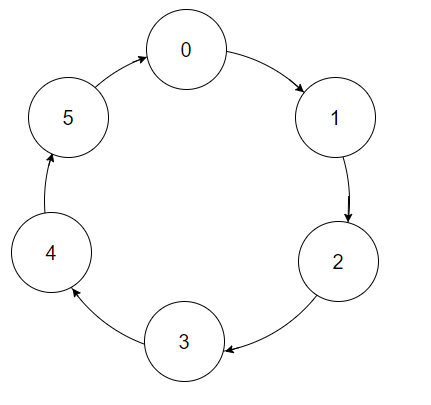

In [ ]:
%%writefile saludoAnillo.c
#include "mpi.h"
#include <stdlib.h>
#include <stdio.h>
#include<string.h>
 
void main ( ) {
    MPI_Init(NULL, NULL);
    
    int rank, size, fuente, destino;
    char mensaje[50];
    MPI_Status status;

    MPI_Comm_size( MPI_COMM_WORLD, &size ); // Numero total de procesos
    MPI_Comm_rank( MPI_COMM_WORLD, &rank ); // Valor de nuestro identificador    
    
    fuente = (rank+1)%size;
    destino = (rank+size-1)%size;

    sprintf( mensaje, "Hola proceso %d un saludo desde el %d", destino,rank );

    MPI_Send( mensaje, strlen(mensaje) + 1, MPI_CHAR, destino, 5, MPI_COMM_WORLD);
    MPI_Recv( mensaje, 50, MPI_CHAR, fuente, 5, MPI_COMM_WORLD, &status );
            
    printf( "Soy %d, recibí <%s> desde %d\n", rank, mensaje, fuente);      
                            
    MPI_Finalize(); 
    return ;
}

Overwriting saludoAnillo.c


In [ ]:
%%script bash
mpicc saludoAnillo.c -o get_count
mpirun --allow-run-as-root -np 4 ./get_count

Soy 3, recibí <Hola proceso 3 un saludo desde el 0> desde 0
Soy 2, recibí <Hola proceso 2 un saludo desde el 3> desde 3
Soy 1, recibí <Hola proceso 1 un saludo desde el 2> desde 2
Soy 0, recibí <Hola proceso 0 un saludo desde el 1> desde 1



# Ejercicios


1. Contar el número de primos en el rango [1,n] (usar MPI_Send/MPI_Recv)
    1. Elegir un proceso root
    2. Hacer que el usuario proporcione el valor de n 
    2. Determinar el rango donde cada proceso buscará números primos [inicial,final]
    3. Contar el número de primos en el rango [inicial,final], nprimos 
    4. Hacer que cada proceso envíe el valor de nprimos al proceso root
    5. El root imprime el total de primos en el rango [1,n]





